In [76]:
import HTSeq
import glob
import matplotlib.pyplot as plt
import seaborn
import numpy
from scipy.stats.stats import pearsonr
import itertools
import scipy


def correct_pvalues_for_multiple_testing(pvalues, correction_type = "Benjamini-Hochberg"):                
    """                                                                                                   
    consistent with R - print correct_pvalues_for_multiple_testing([0.0, 0.01, 0.029, 0.03, 0.031, 0.05, 0.069, 0.07, 0.071, 0.09, 0.1]) 
    """
    from numpy import array, empty                                                                        
    pvalues = array(pvalues) 
    n = float(pvalues.shape[0])                                                                           
    new_pvalues = empty(n)
    if correction_type == "Bonferroni":                                                                   
        new_pvalues = n * pvalues
    elif correction_type == "Bonferroni-Holm":                                                            
        values = [ (pvalue, i) for i, pvalue in enumerate(pvalues) ]                                      
        values.sort()
        for rank, vals in enumerate(values):                                                              
            pvalue, i = vals
            new_pvalues[i] = (n-rank) * pvalue                                                            
    elif correction_type == "Benjamini-Hochberg":                                                         
        values = [ (pvalue, i) for i, pvalue in enumerate(pvalues) ]                                      
        values.sort()
        values.reverse()                                                                                  
        new_values = []
        for i, vals in enumerate(values):                                                                 
            rank = n - i
            pvalue, index = vals                                                                          
            new_values.append((n/rank) * pvalue)                                                          
        for i in xrange(0, int(n)-1):  
            if new_values[i] < new_values[i+1]:                                                           
                new_values[i+1] = new_values[i]                                                           
        for i, vals in enumerate(values):
            pvalue, index = vals
            new_pvalues[index] = new_values[i]                                                                                                                  
    return new_pvalues



#Start codon usage

In [60]:
start_codons = {}

for cfile in glob.glob('CDS_extracted/*.fa'):
    print cfile
    temp = {}
    for read in HTSeq.FastaReader(cfile):
        start = read.seq[:3]
        if start in temp:
            temp[start] +=1
        else:
            temp[start] = 1
    start_codons[cfile.split('/')[1].split('.')[0].replace('_',' ')] = temp

CDS_extracted/Aeropyrum_pernix.CDS.fa
CDS_extracted/Aquifex_aeolicus.CDS.fa
CDS_extracted/Archaeoglobus_fulgidus.CDS.fa
CDS_extracted/Hyperthermus_butyilicus.CDS.fa
CDS_extracted/Methanococcus_jannaschii.CDS.fa
CDS_extracted/Methanopyrus_kandleri.CDS.fa
CDS_extracted/Methanothermus_fervidus.CDS.fa
CDS_extracted/Pyrococcus_feriosus.CDS.fa
CDS_extracted/Pyrodicitium_abyssi.CDS.fa
CDS_extracted/Pyrolobus_fumarii.CDS.fa
CDS_extracted/Sulfolobus_acidocaldarius.CDS.fa
CDS_extracted/Thermocrinis_minervae.CDS.fa
CDS_extracted/Thermocrinis_ruber.CDS.fa
CDS_extracted/Thermotoga_maritima.CDS.fa


In [61]:
start_codons

{'Aeropyrum pernix': {'ATC': 1, 'ATG': 542, 'GTG': 514, 'TTG': 644},
 'Aquifex aeolicus': {'ATA': 1, 'ATG': 1246, 'ATT': 1, 'GTG': 145, 'TTG': 104},
 'Archaeoglobus fulgidus': {'ATA': 6,
  'ATC': 9,
  'ATG': 1965,
  'ATT': 5,
  'CTC': 1,
  'CTG': 11,
  'GTG': 307,
  'TCC': 1,
  'TTG': 101},
 'Hyperthermus butyilicus': {'ATA': 13,
  'ATC': 3,
  'ATG': 724,
  'ATT': 10,
  'CTG': 16,
  'GTG': 353,
  'TTG': 594},
 'Methanococcus jannaschii': {'ACT': 1,
  'AGG': 1,
  'ATA': 29,
  'ATC': 7,
  'ATG': 1519,
  'ATT': 26,
  'CTG': 2,
  'GAG': 1,
  'GTG': 64,
  'TTA': 1,
  'TTG': 91},
 'Methanopyrus kandleri': {'ATG': 502,
  'CAC': 1,
  'CGA': 1,
  'CTC': 2,
  'CTG': 84,
  'GAC': 2,
  'GAG': 1,
  'GCC': 1,
  'GGA': 1,
  'GGC': 1,
  'GGT': 1,
  'GTC': 2,
  'GTG': 588,
  'TAC': 1,
  'TTG': 517},
 'Methanothermus fervidus': {'ATA': 13,
  'ATC': 8,
  'ATG': 1015,
  'ATT': 12,
  'CTG': 3,
  'GTG': 76,
  'TTG': 173},
 'Pyrococcus feriosus': {'ATA': 3,
  'ATG': 1745,
  'ATT': 7,
  'CTG': 5,
  'GTA': 1,


(0.60717718782776253, 0.021291458483582711)


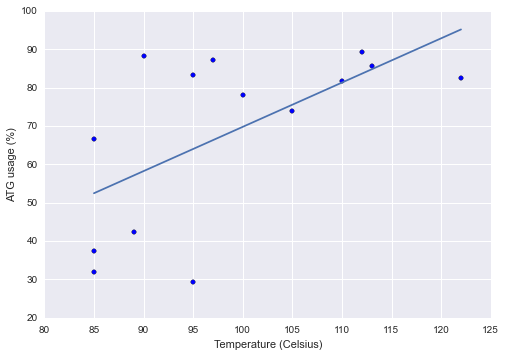

In [62]:
Temp = [100,95,95,112,85,122,97,105,110,113,85,85,89,90]

values = []
for k,v in start_codons.iteritems():
    total = 0
    for g,h in v.iteritems():
        total += h
        
    norm = (v['ATG']/float(total)) * 100
    values.append(norm)
        
        
plt.scatter(Temp,values)
plt.xlabel('Temperature (Celsius) ')
plt.ylabel('ATG usage (%)')
import numpy as np
x = Temp
y = values
plt.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1))(np.unique(x)))
plt.savefig('ATG_start_codon_usage.pdf')
print pearsonr(Temp,values )


In [67]:
outputting = open('Start_codon_correlations.csv','w')
lines = []
pvals = []


Temp = [100,95,95,112,85,122,97,105,110,113,85,85,89,90]



tots = {}
num = 0
for k,v in start_codons.iteritems():
    num +=1
    for g,h in v.iteritems():
        if g in tots:
            tots[g] +=1
        else:
            tots[g] = 1

print num


codons_of_interest = []

for k,v in tots.iteritems():
    if v == num:
        codons_of_interest.append(k)

for i in codons_of_interest:
    values = []
    for k,v in start_codons.iteritems():
        total = 0
        for g,h in v.iteritems():
            total += h

        norm = (v[i]/float(total)) * 100
        values.append(norm)

    sig = pearsonr(Temp,values )[1]
    r2 = pearsonr(Temp,values )[0]
    pvals.append(sig)
    lines.append( i + ',' + str(r2) + ',' + str(sig))
    
    
adjusted = correct_pvalues_for_multiple_testing(pvals)

for g,h in zip(lines,adjusted):
    outputting.write(g + ',' + str(h) + '\n')

outputting.close()


14


/Users/thomashitch/lab-dev/lib/python2.7/site-packages/IPython/kernel/__main__.py:18: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


In [5]:

datas = {}
for k,v in start_codons.iteritems():
    total = 0
    for g,h in v.iteritems():
        if g in datas:
            datas[g] +=1
        else:
            datas[g] = 1
            
datas

{'AAG': 1,
 'ACT': 1,
 'AGC': 1,
 'AGG': 2,
 'ATA': 11,
 'ATC': 10,
 'ATG': 14,
 'ATT': 11,
 'CAC': 1,
 'CGA': 1,
 'CGT': 1,
 'CTC': 2,
 'CTG': 12,
 'GAA': 1,
 'GAC': 1,
 'GAG': 2,
 'GCC': 2,
 'GGA': 2,
 'GGC': 2,
 'GGT': 1,
 'GTA': 1,
 'GTC': 1,
 'GTG': 14,
 'TAC': 1,
 'TCC': 1,
 'TGG': 1,
 'TTA': 1,
 'TTC': 1,
 'TTG': 14,
 'TTT': 1}

(-0.54934374659041774, 0.041874979739136148)


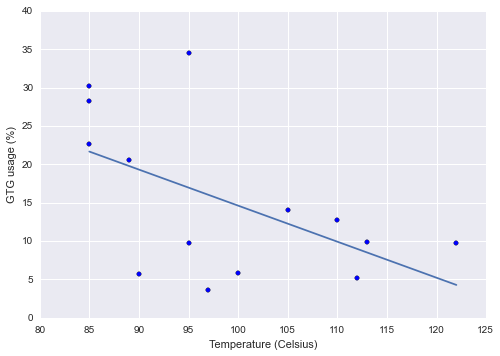

In [6]:
Temp = [100,95,95,112,85,122,97,105,110,113,85,85,89,90]

values = []
for k,v in start_codons.iteritems():
    total = 0
    for g,h in v.iteritems():
        total += h
        
    norm = (v['GTG']/float(total)) * 100
    values.append(norm)
        
        
plt.scatter(Temp,values)
plt.xlabel('Temperature (Celsius) ')
plt.ylabel('GTG usage (%)')
import numpy as np
x = Temp
y = values
plt.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1))(np.unique(x)))
plt.savefig('GTG_start_codon_usage.pdf')

print pearsonr(Temp,values )


(-0.62890662075836046, 0.015981220827384953)


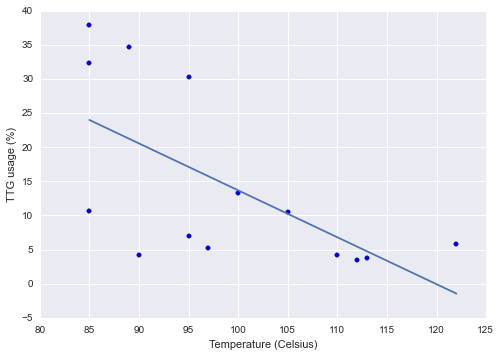

In [7]:
Temp = [100,95,95,112,85,122,97,105,110,113,85,85,89,90]

values = []
for k,v in start_codons.iteritems():
    total = 0
    for g,h in v.iteritems():
        total += h
        
    norm = (v['TTG']/float(total)) * 100
    values.append(norm)
        
        
plt.scatter(Temp,values)
plt.xlabel('Temperature (Celsius)')
plt.ylabel('TTG usage (%)')
import numpy as np
x = Temp
y = values
plt.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1))(np.unique(x)))
plt.savefig('TTG_start_codon_usage.pdf')
print pearsonr(Temp,values )


In [12]:
baseline_starts

{'Escherichia coli.HUSEC2011CHR1.cds.all': {'ATG': 4690,
  'GTG': 551,
  'TTG': 253},
 'Micrococcus luteus gca 000632005.Willow Endophyte RIT304.cds.all': {'ATG': 1553,
  'GTG': 679,
  'TTG': 16},
 'Pseudomonas aeruginosa.PUPa3 1.0.cds.all': {'AAG': 2,
  'ACA': 1,
  'ACC': 2,
  'AGC': 1,
  'ATC': 1,
  'ATG': 5107,
  'ATT': 1,
  'CCG': 3,
  'CGC': 3,
  'CGG': 1,
  'CTC': 1,
  'CTG': 4,
  'GAA': 3,
  'GAC': 1,
  'GAG': 2,
  'GAT': 1,
  'GCC': 4,
  'GCG': 1,
  'GGC': 3,
  'GTG': 453,
  'GTT': 1,
  'TCC': 1,
  'TCG': 1,
  'TGT': 1,
  'TTC': 1,
  'TTG': 118},
 'Salmonella enterica.ASM78381v1.cds.all': {'AGC': 1,
  'ATA': 3,
  'ATG': 4027,
  'ATT': 1,
  'CAG': 2,
  'CTG': 1,
  'GTG': 349,
  'TTG': 88},
 'Staphylococcus aureus gca 000626615.ASM62661v1.cds.all': {'ATG': 2252,
  'GTG': 173,
  'TTG': 203}}

#Compare to other genome groups

In [39]:
#Thermophile
start_codons = {}

for cfile in glob.glob('CDS_extracted/*.fa'):
    print cfile
    temp = {}
    for read in HTSeq.FastaReader(cfile):
        start = read.seq[:3]
        if start in temp:
            temp[start] +=1
        else:
            temp[start] = 1
    start_codons[cfile.split('/')[1].split('.')[0].replace('_',' ')] = temp
    
    
norm_therm = {}
    
for k,v in start_codons.iteritems():
    total = 0
    for g,h in v.iteritems():
        total += h
    temp = {}
    for g,h in v.iteritems():
        norm = (h/float(total)) * 100
        temp[g] = norm
    norm_therm[k] = temp
    
    




#Baseline

baseline_starts = {}

for cfile in glob.glob('Other_genomes/Normies/*.fa'):
    print cfile
    temp = {}
    for read in HTSeq.FastaReader(cfile):
        start = read.seq[:3]
        if start in temp:
            temp[start] +=1
        else:
            temp[start] = 1
    baseline_starts[cfile.split('/')[2].split('.fa')[0].replace('_',' ')] = temp
    
    

norm_base = {}
    
for k,v in start_codons.iteritems():
    total = 0
    for g,h in v.iteritems():
        total += h
    temp = {}
    for g,h in v.iteritems():
        norm = (h/float(total)) * 100
        temp[g] = norm
    norm_base[k] = temp
    
    
    
    
    
    
    
    
#Psychrophile

psych_starts = {}

for cfile in glob.glob('Other_genomes/Psychrophile/*.fa'):
    print cfile
    temp = {}
    for read in HTSeq.FastaReader(cfile):
        start = read.seq[:3]
        if start in temp:
            temp[start] +=1
        else:
            temp[start] = 1
    psych_starts[cfile.split('/')[2].split('.fa')[0].replace('_',' ')] = temp
    
    

norm_psych = {}
    
for k,v in start_codons.iteritems():
    total = 0
    for g,h in v.iteritems():
        total += h
    temp = {}
    for g,h in v.iteritems():
        norm = (h/float(total)) * 100
        temp[g] = norm
    norm_psych[k] = temp
        



CDS_extracted/Aeropyrum_pernix.CDS.fa
CDS_extracted/Aquifex_aeolicus.CDS.fa
CDS_extracted/Archaeoglobus_fulgidus.CDS.fa
CDS_extracted/Hyperthermus_butyilicus.CDS.fa
CDS_extracted/Methanococcus_jannaschii.CDS.fa
CDS_extracted/Methanopyrus_kandleri.CDS.fa
CDS_extracted/Methanothermus_fervidus.CDS.fa
CDS_extracted/Pyrococcus_feriosus.CDS.fa
CDS_extracted/Pyrodicitium_abyssi.CDS.fa
CDS_extracted/Pyrolobus_fumarii.CDS.fa
CDS_extracted/Sulfolobus_acidocaldarius.CDS.fa
CDS_extracted/Thermocrinis_minervae.CDS.fa
CDS_extracted/Thermocrinis_ruber.CDS.fa
CDS_extracted/Thermotoga_maritima.CDS.fa
Other_genomes/Normies/Escherichia_coli.HUSEC2011CHR1.cds.all.fa
Other_genomes/Normies/Micrococcus_luteus_gca_000632005.Willow_Endophyte_RIT304.cds.all.fa
Other_genomes/Normies/Pseudomonas_aeruginosa.PUPa3_1.0.cds.all.fa
Other_genomes/Normies/Salmonella_enterica.ASM78381v1.cds.all.fa
Other_genomes/Normies/Staphylococcus_aureus_gca_000626615.ASM62661v1.cds.all.fa
Other_genomes/Psychrophile/Cenarchaeum_symbio

In [40]:
therm_vals = {}

for k,v in norm_therm.iteritems():
    for f,g in v.iteritems():
        if f in therm_vals:
            prev = therm_vals[f]
            prev.append(g)
            therm_vals[f] = prev
        else:
            therm_vals[f] = [g]
            
            
            
            
base_vals = {}

for k,v in norm_base.iteritems():
    for f,g in v.iteritems():
        if f in therm_vals:
            prev = therm_vals[f]
            prev.append(g)
            base_vals[f] = prev
        else:
            base_vals[f] = [g]
            
            
            
            
            
psych_vals = {}

for k,v in norm_psych.iteritems():
    for f,g in v.iteritems():
        if f in therm_vals:
            prev = therm_vals[f]
            prev.append(g)
            psych_vals[f] = prev
        else:
            psych_vals[f] = [g]

In [41]:
psych_vals

{'AAG': [0.05370569280343716, 0.05370569280343716, 0.05370569280343716],
 'ACT': [0.0574052812858783, 0.0574052812858783, 0.0574052812858783],
 'AGC': [0.05370569280343716, 0.05370569280343716, 0.05370569280343716],
 'AGG': [0.0574052812858783,
  0.06784260515603799,
  0.0574052812858783,
  0.06784260515603799,
  0.0574052812858783,
  0.06784260515603799],
 'ATA': [1.0,
  0.06680026720106881,
  0.6222775357809583,
  0.24937655860349126,
  0.9657594381035997,
  1.6647531572904706,
  0.7462686567164178,
  0.5860415556739478,
  0.14727540500736377,
  0.3686150605581885,
  0.7589025102159953,
  1.0,
  0.06680026720106881,
  0.6222775357809583,
  0.24937655860349126,
  0.9657594381035997,
  1.6647531572904706,
  0.7462686567164178,
  0.5860415556739478,
  0.14727540500736377,
  0.3686150605581885,
  0.7589025102159953,
  1.0,
  0.06680026720106881,
  0.6222775357809583,
  0.24937655860349126,
  0.9657594381035997,
  1.6647531572904706,
  0.7462686567164178,
  0.5860415556739478,
  0.1472754

In [37]:
All_starts = {}

for i in [psych_vals,therm_vals,base_vals]:
    for k,v in i.iteritems():
        if k in All_starts:
            All_starts[k] += len(v)
        else:
            All_starts[k] = len(v)
            
            
Wanted_starts = []

for k,v in All_starts.iteritems():
    if v >= 30:
        Wanted_starts.append(k)

ATG 126
AAG 9
ATC 90
ATA 99
AGG 18
CTC 18
AGC 9
ATT 99
CTG 108
ACT 9
CAC 9
GGT 9
CGA 9
TTT 9
GGA 18
TGG 9
GGC 18
TAC 9
GAG 18
TTA 9
GAC 9
TCC 9
GAA 9
GTA 9
GCC 18
GTC 9
GTG 126
TTC 9
TTG 126
CGT 9


In [36]:
Wanted_starts

['ATG', 'ATC', 'ATA', 'ATT', 'CTG', 'GTG', 'TTG']

In [43]:
for cstart in Wanted_starts:
    print cstart
    norm = base_vals[cstart]
    psych = psych_vals[cstart]
    therm = therm_vals[cstart]
    print scipy.stats.ranksums(therm, psych)
    print scipy.stats.ranksums(therm, norm)
    print scipy.stats.ranksums(norm, psych)

ATG
RanksumsResult(statistic=0.0, pvalue=1.0)
RanksumsResult(statistic=0.0, pvalue=1.0)
RanksumsResult(statistic=0.0, pvalue=1.0)
ATC
RanksumsResult(statistic=0.0, pvalue=1.0)
RanksumsResult(statistic=0.0, pvalue=1.0)
RanksumsResult(statistic=0.0, pvalue=1.0)
ATA
RanksumsResult(statistic=0.0, pvalue=1.0)
RanksumsResult(statistic=0.0, pvalue=1.0)
RanksumsResult(statistic=0.0, pvalue=1.0)
ATT
RanksumsResult(statistic=0.0, pvalue=1.0)
RanksumsResult(statistic=0.0, pvalue=1.0)
RanksumsResult(statistic=0.0, pvalue=1.0)
CTG
RanksumsResult(statistic=0.0, pvalue=1.0)
RanksumsResult(statistic=0.0, pvalue=1.0)
RanksumsResult(statistic=0.0, pvalue=1.0)
GTG
RanksumsResult(statistic=0.0, pvalue=1.0)
RanksumsResult(statistic=0.0, pvalue=1.0)
RanksumsResult(statistic=0.0, pvalue=1.0)
TTG
RanksumsResult(statistic=0.0, pvalue=1.0)
RanksumsResult(statistic=0.0, pvalue=1.0)
RanksumsResult(statistic=0.0, pvalue=1.0)


#Codon usage

In [86]:
import re
import re

codons = {}

for cfile in glob.glob('CDS_extracted/*.fa'):
    print cfile
    temp = {}
    for read in HTSeq.FastaReader(cfile):
        sequence = read.seq
        n = 3
        all_codons = [sequence[i:i+n] for i in range(0, len(sequence), n)]
        for codon in all_codons:
            if codon in temp:
                temp[codon] +=1
            else:
                temp[codon] = 1
    codons[cfile.split('/')[1].split('.')[0].replace('_',' ')] = temp

CDS_extracted/Aeropyrum_pernix.CDS.fa
CDS_extracted/Aquifex_aeolicus.CDS.fa
CDS_extracted/Archaeoglobus_fulgidus.CDS.fa
CDS_extracted/Hyperthermus_butyilicus.CDS.fa
CDS_extracted/Methanococcus_jannaschii.CDS.fa
CDS_extracted/Methanopyrus_kandleri.CDS.fa
CDS_extracted/Methanothermus_fervidus.CDS.fa
CDS_extracted/Pyrococcus_feriosus.CDS.fa
CDS_extracted/Pyrodicitium_abyssi.CDS.fa
CDS_extracted/Pyrolobus_fumarii.CDS.fa
CDS_extracted/Sulfolobus_acidocaldarius.CDS.fa
CDS_extracted/Thermocrinis_minervae.CDS.fa
CDS_extracted/Thermocrinis_ruber.CDS.fa
CDS_extracted/Thermotoga_maritima.CDS.fa


In [78]:
codons

{'Aeropyrum pernix': {'AAA': 4218,
  'AAC': 7640,
  'AAG': 16156,
  'AAT': 1900,
  'ACA': 4881,
  'ACC': 6655,
  'ACG': 5098,
  'ACT': 4066,
  'AG': 1,
  'AGA': 5644,
  'AGC': 12056,
  'AGG': 25881,
  'AGT': 2838,
  'ATA': 18552,
  'ATC': 5345,
  'ATG': 9714,
  'ATT': 4095,
  'CAA': 1117,
  'CAC': 5278,
  'CAG': 7172,
  'CAT': 2105,
  'CCA': 3566,
  'CCC': 10306,
  'CCG': 5879,
  'CCT': 5370,
  'CGA': 697,
  'CGC': 2163,
  'CGG': 2602,
  'CGT': 1244,
  'CTA': 9991,
  'CTC': 17233,
  'CTG': 14828,
  'CTT': 7574,
  'G': 1,
  'GAA': 5526,
  'GAC': 14616,
  'GAG': 32097,
  'GAT': 6974,
  'GCA': 7222,
  'GCC': 18120,
  'GCG': 10493,
  'GCT': 12217,
  'GGA': 6104,
  'GGC': 16829,
  'GGG': 13025,
  'GGT': 7695,
  'GTA': 7250,
  'GTC': 11616,
  'GTG': 15366,
  'GTT': 11872,
  'TAA': 382,
  'TAC': 12121,
  'TAG': 933,
  'TAT': 5400,
  'TCA': 2874,
  'TCC': 5616,
  'TCG': 4130,
  'TCT': 3343,
  'TGA': 408,
  'TGC': 2403,
  'TGG': 6507,
  'TGT': 909,
  'TTA': 2017,
  'TTC': 11667,
  'TTG': 3410,


In [79]:

datas = {}
for k,v in codons.iteritems():
    total = 0
    for g,h in v.iteritems():
        if g in datas:
            datas[g] +=1
        else:
            datas[g] = 1
         
codons_of_interest = []
for k,v in datas.iteritems():
    if v ==14:
        print k
        codons_of_interest.append(k)

CTT
ATG
AAG
AAA
ATC
AAC
ATA
AGG
CCT
ACT
AGC
ACA
AGA
CAT
AAT
ATT
CTG
CTA
CTC
CAC
ACG
CAA
AGT
CCA
CCG
CCC
TAT
GGT
TGT
CGA
CAG
TCT
GAT
CGG
TTT
TGC
GGG
TAG
GGA
TAA
GGC
TAC
GAG
TCG
TTA
GAC
TCC
GAA
TCA
GCA
GCC
GTA
GCG
GTG
TTC
GTT
GCT
ACC
TGA
TTG
CGT
TGG
GTC
CGC


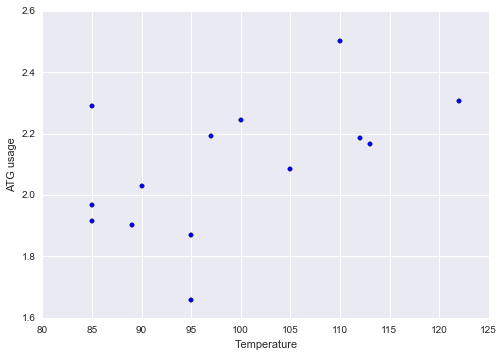

(0.53369182638729162, 0.049349124249241559)


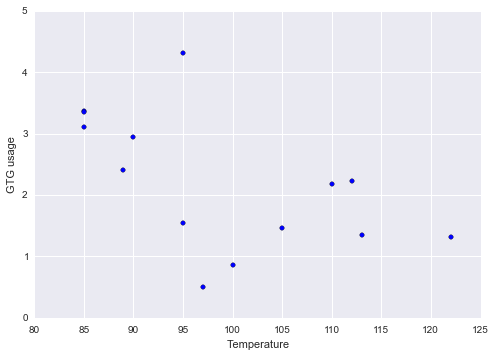

(-0.55133655732247733, 0.040986766185341098)


In [72]:
for i in codons_of_interest:
    values = []
    for k,v in codons.iteritems():
        total = 0
        for g,h in v.iteritems():
            total += h

        norm = (v[i]/float(total)) * 100
        values.append(norm)

    sig = pearsonr(Temp,values )[1]
    if sig > 0.05:
        continue
    else:
        plt.scatter(Temp,values)
        plt.xlabel('Temperature ')
        plt.ylabel(i + ' usage ')
        plt.show()
        print pearsonr(Temp,values )

In [73]:
outputting = open('Codon_correlations.csv','w')
lines = []
pvals = []
for i in codons_of_interest:
    values = []
    for k,v in codons.iteritems():
        total = 0
        for g,h in v.iteritems():
            total += h

        norm = (v[i]/float(total)) * 100
        values.append(norm)
    if len(values) == 14:
        sig = pearsonr(Temp,values )[1]
        r2 = pearsonr(Temp,values )[0]
        pvals.append(sig)
        lines.append( i + ',' + str(r2) + ',' + str(sig))

    
adjusted = correct_pvalues_for_multiple_testing(pvals)

for g,h in zip(lines,adjusted):
    outputting.write(g + ',' + str(h) + '\n')

outputting.close()


/Users/thomashitch/lab-dev/lib/python2.7/site-packages/IPython/kernel/__main__.py:18: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


#Position base selection

In [87]:
bases_position = {}

for k,v in codons.iteritems():
    temp1 = {}
    temp2 = {}
    temp3 = {}
    for g,h in v.iteritems():
        listing = list(g)
        if listing[0] in temp:
            temp1[listing[0]] += h
        else:
            temp1[listing[0]] = h
        if listing[1] in temp:
            temp2[listing[1]] += h
        else:
            temp2[listing[1]] = h
        if listing[2] in temp:
            temp3[listing[2]] += h
        else:
            temp3[listing[2]] = h
    bases_position[k] = [temp1,temp2,temp3]

IndexError: list index out of range

In [75]:
bases_position

{}

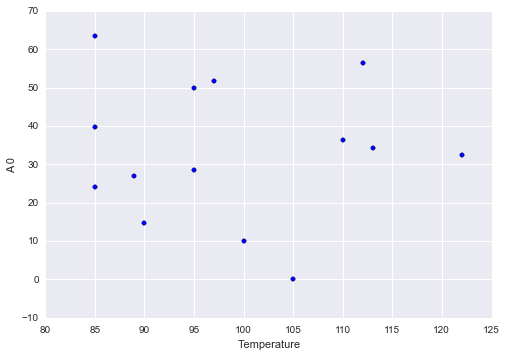

(-0.045687607553022522, 0.87675140871607993)


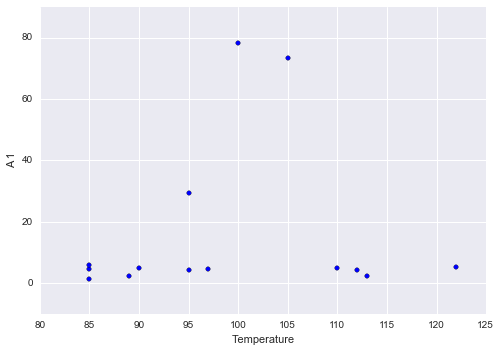

(0.11000607704890961, 0.7081297369708528)


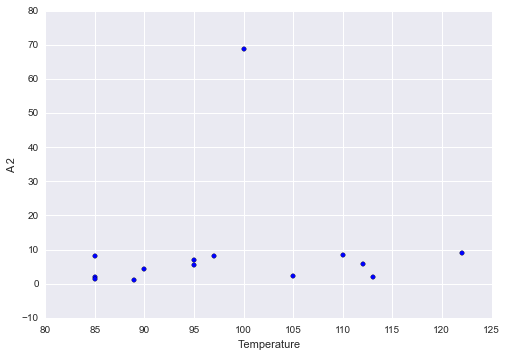

(0.088629236283095728, 0.76318948229980277)


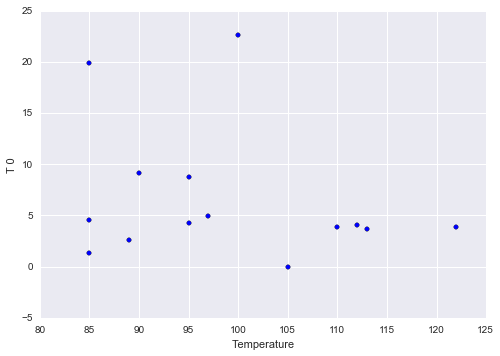

(-0.24697295698850999, 0.39463916712585989)


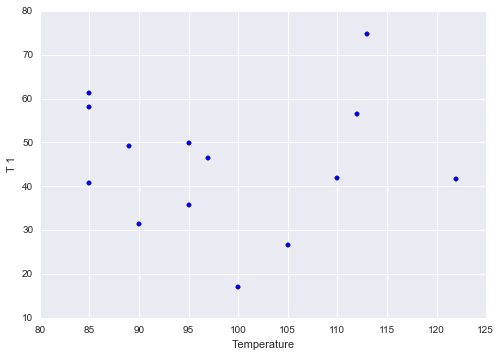

(0.024541132975698269, 0.93363302259594949)


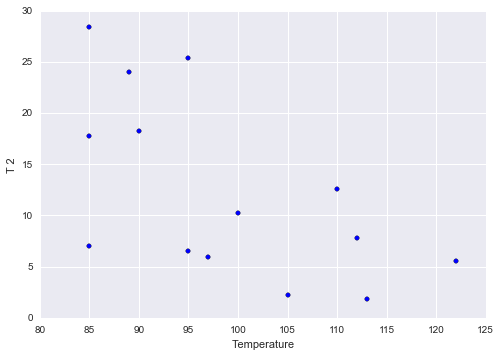

(-0.60724468624331773, 0.021273137525511063)


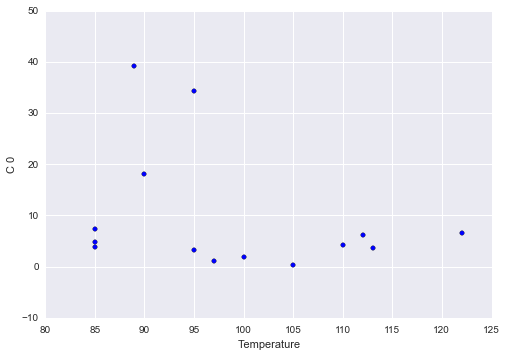

(-0.2984553767468594, 0.29998338160871157)


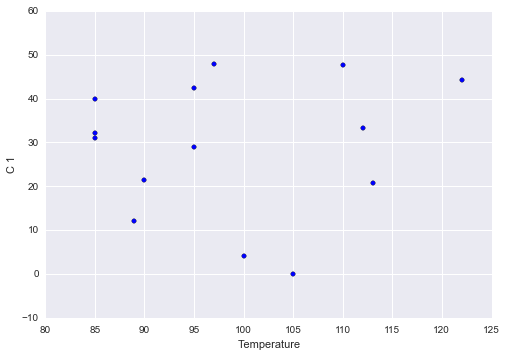

(0.089771419373180367, 0.76021862413713015)


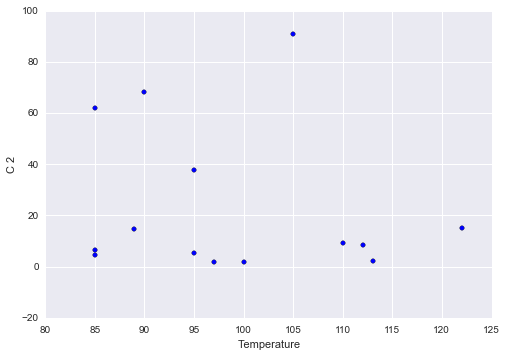

(-0.16576579922671059, 0.57115303103772841)


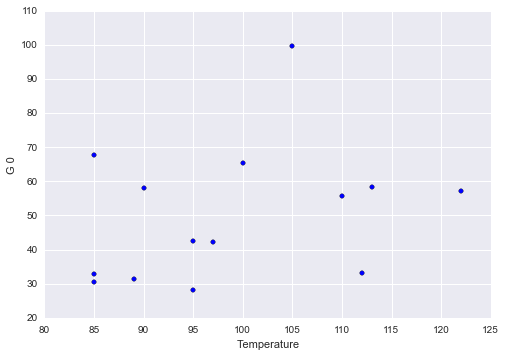

(0.30920535805556904, 0.28205349597036988)


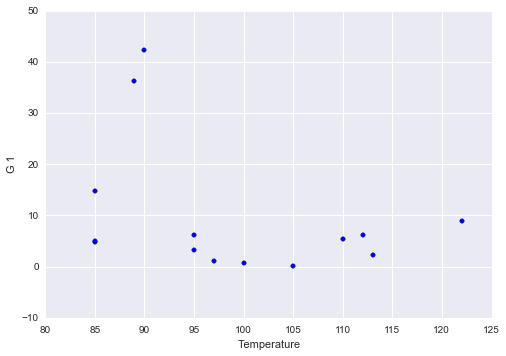

(-0.35498723619370254, 0.21296104861493198)


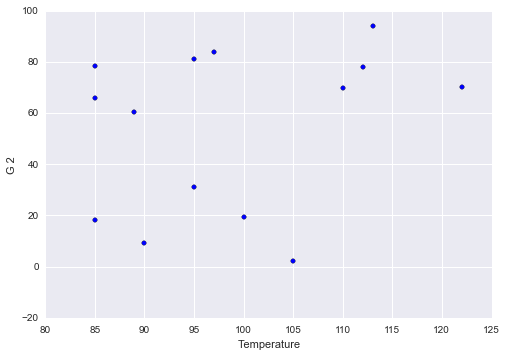

(0.27442457167556722, 0.34237981727369027)


In [15]:
for base in ['A','T','C','G']:
    for position in [0,1,2]:
        values = []
        for k,v in bases_position.iteritems():
            total = 0
            for g,h in v[position].iteritems():
                total += h

            norm = (v[position][base]/float(total)) * 100
            values.append(norm)

        sig = pearsonr(Temp,values )[1]

        plt.scatter(Temp,values)
        plt.xlabel('Temperature ')
        plt.ylabel(base + ' ' + str(position))
        plt.show()
        print pearsonr(Temp,values )

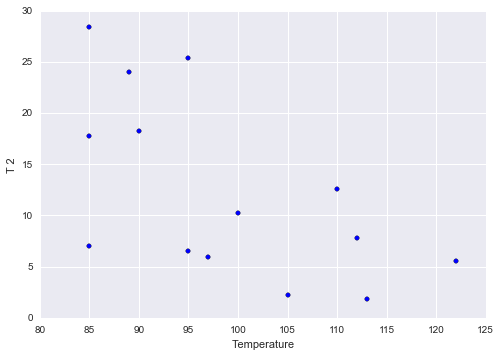

(-0.60724468624331773, 0.021273137525511063)


In [16]:
for base in ['A','T','C','G']:
    for position in [0,1,2]:
        values = []
        for k,v in bases_position.iteritems():
            total = 0
            for g,h in v[position].iteritems():
                total += h

            norm = (v[position][base]/float(total)) * 100
            values.append(norm)

        sig = pearsonr(Temp,values )[1]
        if sig > 0.05:
            continue
        else:
            plt.scatter(Temp,values)
            plt.xlabel('Temperature ')
            plt.ylabel(base + ' ' + str(position))
            plt.show()
            print pearsonr(Temp,values )

#Combining position counds by 'AT' or 'CG'

In [81]:
bases_position2 = {}

for k,v in bases_position.iteritems(): # Genome and position list of dics
    temp = []
    for i in v: # list of dics
        temp2 = {}
        GC = 0
        AT = 0
        for g,h in i.iteritems():
            if g == 'A' or g == 'T':
                AT += h
            elif g == 'C' or g == 'G':
                GC += h
        temp2['GC'] = GC
        temp2['AT'] = AT
        temp.append(temp2)
    bases_position2[k] = temp

In [83]:
bases_position2

{}

In [82]:
for base in ['AT','GC']:
    for position in [0,1,2]:
        values = []
        for k,v in bases_position2.iteritems():
            total = 0
            for g,h in v[position].iteritems():
                total += h

            norm = (v[position][base]/float(total)) * 100
            values.append(norm)

        sig = pearsonr(Temp,values )[1]

        plt.scatter(Temp,values)
        plt.xlabel('Temperature ')
        plt.ylabel(base + ' ' + str(position))
        plt.savefig(base + str(position) + '_figure.pdf')
        plt.show()
        print pearsonr(Temp,values )

/Users/thomashitch/lab-dev/lib/python2.7/site-packages/numpy/core/_methods.py:59: RuntimeWarning: Mean of empty slice.
  warnings.warn("Mean of empty slice.", RuntimeWarning)


ValueError: operands could not be broadcast together with shapes (14,) (0,) 

#Amino acid usage 

In [98]:
def swap_dna(dnastring):
    table = {
        'ATA':'I', 'ATC':'I', 'ATT':'I', 'ATG':'M',
        'ACA':'T', 'ACC':'T', 'ACG':'T', 'ACT':'T',
        'AAC':'N', 'AAT':'N', 'AAA':'K', 'AAG':'K',
        'AGC':'S', 'AGT':'S', 'AGA':'R', 'AGG':'R',
        'CTA':'L', 'CTC':'L', 'CTG':'L', 'CTT':'L',
        'CCA':'P', 'CCC':'P', 'CCG':'P', 'CCT':'P',
        'CAC':'H', 'CAT':'H', 'CAA':'Q', 'CAG':'Q',
        'CGA':'R', 'CGC':'R', 'CGG':'R', 'CGT':'R',
        'GTA':'V', 'GTC':'V', 'GTG':'V', 'GTT':'V',
        'GCA':'A', 'GCC':'A', 'GCG':'A', 'GCT':'A',
        'GAC':'D', 'GAT':'D', 'GAA':'E', 'GAG':'E',
        'GGA':'G', 'GGC':'G', 'GGG':'G', 'GGT':'G',
        'TCA':'S', 'TCC':'S', 'TCG':'S', 'TCT':'S',
        'TTC':'F', 'TTT':'F', 'TTA':'L', 'TTG':'L',
        'TAC':'Y', 'TAT':'Y', 'TAA':'_', 'TAG':'_',
        'TGC':'C', 'TGT':'C', 'TGA':'_', 'TGG':'W',
        }
    protein = []
    end = len(dnastring) - (len(dnastring) %3) - 1
    for i in range(0,end,3):
        codon = dnastring[i:i+3]
        if codon in table:
            aminoacid = table[codon]
            protein.append(aminoacid)
        else:
            protein.append("N")
    return "".join(protein)


In [99]:
protein_lengths = {}

amino_acid_usage = {}

for cfile in glob.glob('CDS_extracted/*.fa'):
    name = cfile.split('/')[1].split('.')[0]
    print name
    temp_AA = {}
    temp_lengths = {}
    for read in HTSeq.FastaReader(cfile):
        protein = swap_dna(read.seq)
        length = len(protein)
        if length in temp_lengths:
            temp_lengths[length] +=1
        else:
            temp_lengths[length] = 1
    
        for AA in list(protein):
            if AA in temp_AA:
                temp_AA[AA] +=1
            else:
                temp_AA[AA] = 1
        
    protein_lengths[name] = temp_lengths
    amino_acid_usage[name] = temp_AA
        

Aeropyrum_pernix
Aquifex_aeolicus
Archaeoglobus_fulgidus
Hyperthermus_butyilicus
Methanococcus_jannaschii
Methanopyrus_kandleri
Methanothermus_fervidus
Pyrococcus_feriosus
Pyrodicitium_abyssi
Pyrolobus_fumarii
Sulfolobus_acidocaldarius
Thermocrinis_minervae
Thermocrinis_ruber
Thermotoga_maritima


#AA usage

In [103]:
outputting = open('AminoAcid_correlations.csv','w')
lines = []
pvals = []
for i in amino_acid_usage['Aeropyrum_pernix'].keys():
    values = []
    for k,v in amino_acid_usage.iteritems():
        total = 0
        for g,h in v.iteritems():
            total += h

        norm = (v[i]/float(total)) * 100
        values.append(norm)
    if len(values) == 14:
        sig = pearsonr(Temp,values )[1]
        r2 = pearsonr(Temp,values )[0]
        pvals.append(sig)
        lines.append( i + ',' + str(r2) + ',' + str(sig))

adjusted = correct_pvalues_for_multiple_testing(pvals)

for g,h in zip(lines,adjusted):
    outputting.write(g + ',' + str(h) + '\n')

outputting.close()


/Users/thomashitch/lab-dev/lib/python2.7/site-packages/IPython/kernel/__main__.py:18: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


In [100]:
amino_acid_usage

{'Aeropyrum_pernix': {'A': 48052,
  'C': 3312,
  'D': 21590,
  'E': 37623,
  'F': 14439,
  'G': 43653,
  'H': 7383,
  'I': 27992,
  'K': 20374,
  'L': 55053,
  'M': 9714,
  'N': 9540,
  'P': 25121,
  'Q': 8289,
  'R': 38231,
  'S': 30857,
  'T': 20700,
  'V': 46104,
  'W': 6507,
  'Y': 17521,
  '_': 1723},
 'Aquifex_aeolicus': {'A': 27900,
  'C': 3773,
  'D': 20503,
  'E': 45778,
  'F': 24310,
  'G': 31904,
  'H': 7323,
  'I': 34769,
  'K': 44692,
  'L': 50177,
  'M': 8885,
  'N': 17066,
  'P': 19265,
  'Q': 9693,
  'R': 23295,
  'S': 22643,
  'T': 19876,
  'V': 37733,
  'W': 4394,
  'Y': 19584,
  '_': 1499},
 'Archaeoglobus_fulgidus': {'A': 52393,
  'C': 7844,
  'D': 32676,
  'E': 59635,
  'F': 30339,
  'G': 48598,
  'H': 9998,
  'I': 48075,
  'K': 45970,
  'L': 63361,
  'M': 16765,
  'N': 21318,
  'P': 25712,
  'Q': 11999,
  'R': 38980,
  'S': 36851,
  'T': 27897,
  'V': 57510,
  'W': 7022,
  'Y': 24228,
  '_': 2854},
 'Hyperthermus_butyilicus': {'A': 46614,
  'C': 4456,
  'D': 19352

In [90]:
protein_lengths

{'Aeropyrum_pernix': {31: 1,
  32: 1,
  33: 1,
  36: 1,
  37: 1,
  39: 1,
  41: 1,
  42: 1,
  43: 1,
  46: 1,
  49: 1,
  51: 2,
  52: 1,
  55: 2,
  57: 6,
  58: 4,
  59: 3,
  60: 3,
  61: 2,
  62: 1,
  63: 1,
  64: 2,
  65: 2,
  66: 2,
  67: 5,
  68: 1,
  69: 3,
  70: 1,
  72: 4,
  73: 3,
  74: 6,
  75: 4,
  76: 2,
  77: 4,
  78: 4,
  79: 3,
  80: 6,
  81: 4,
  82: 3,
  83: 2,
  84: 9,
  85: 4,
  86: 4,
  87: 3,
  88: 5,
  89: 7,
  90: 3,
  91: 6,
  92: 7,
  93: 6,
  94: 6,
  95: 8,
  96: 4,
  97: 3,
  98: 2,
  99: 5,
  100: 3,
  101: 5,
  102: 8,
  103: 4,
  104: 6,
  105: 5,
  106: 4,
  107: 4,
  108: 6,
  109: 10,
  110: 4,
  111: 7,
  112: 4,
  113: 6,
  114: 3,
  115: 3,
  116: 7,
  117: 7,
  118: 3,
  119: 3,
  120: 2,
  121: 3,
  122: 4,
  123: 1,
  124: 6,
  125: 3,
  127: 2,
  128: 3,
  129: 6,
  130: 3,
  131: 2,
  132: 3,
  133: 7,
  134: 7,
  135: 3,
  136: 7,
  137: 5,
  138: 1,
  139: 3,
  140: 5,
  141: 4,
  142: 7,
  143: 7,
  144: 7,
  145: 8,
  146: 6,
  147: 5,
  148

In [91]:
protein_lengths_every100 = {}

for genome, info in protein_lengths.iteritems():
    temp = {}
    for length, occurance in info.iteritems():
        if length in range(0,149):
            if 100 in temp:
                temp[100] +=1
            else:
                temp[100] = 1
        if length in range(150,249):
            if 200 in temp:
                temp[200] +=1
            else:
                temp[200] = 1
        if length in range(250,349):
            if 300 in temp:
                temp[300] +=1
            else:
                temp[300] = 1
        if length in range(350,449):
            if 400 in temp:
                temp[400] +=1
            else:
                temp[400] = 1
        if length in range(450,549):
            if 500 in temp:
                temp[500] +=1
            else:
                temp[500] = 1
        if length in range(550,649):
            if 600 in temp:
                temp[600] +=1
            else:
                temp[600] = 1
        if length in range(650,749):
            if 700 in temp:
                temp[700] +=1
            else:
                temp[700] = 1
        if length in range(750,849):
            if 800 in temp:
                temp[800] +=1
            else:
                temp[800] = 1
        if length in range(850,949):
            if 900 in temp:
                temp[900] +=1
            else:
                temp[900] = 1
        if length in range(950,1049):
            if 1000 in temp:
                temp[1000] +=1
            else:
                temp[1000] = 1
        if length in range(1050,1149):
            if 1100 in temp:
                temp[1100] +=1
            else:
                temp[1100] = 1
        if length in range(1150,1249):
            if 1200 in temp:
                temp[1200] +=1
            else:
                temp[1200] = 1
        if length in range(1250,1349):
            if 1300 in temp:
                temp[1300] +=1
            else:
                temp[1300] = 1
        if length in range(1350,1449):
            if 1400 in temp:
                temp[1400] +=1
            else:
                temp[1400] = 1
        if length in range(1450,1549):
            if 1500 in temp:
                temp[1500] +=1
            else:
                temp[1500] = 1
        if length in range(1550,1649):
            if 1600 in temp:
                temp[1600] +=1
            else:
                temp[1600] = 1
        if length in range(1650,1749):
            if 1700 in temp:
                temp[1700] +=1
            else:
                temp[1700] = 1
        if length in range(1750,1849):
            if 1800 in temp:
                temp[1800] +=1
            else:
                temp[1800] = 1
        if length in range(1850,1949):
            if 1900 in temp:
                temp[1900] +=1
            else:
                temp[1900] = 1
        if length in range(1950,2049):
            if 2000 in temp:
                temp[2000] +=1
            else:
                temp[2000] = 1
        if length >= 2050: #Will cut off axis at 2500 so makes no difference
            if 3000 in temp:
                temp[3000] +=1
            else:
                temp[3000] = 1
    protein_lengths_every100[genome] = temp

In [92]:
protein_lengths_every100

{'Aeropyrum_pernix': {100: 104,
  200: 98,
  300: 96,
  400: 90,
  500: 69,
  600: 43,
  700: 29,
  800: 11,
  900: 10,
  1000: 6,
  1100: 1,
  1200: 5,
  1300: 3,
  1400: 2,
  1500: 1,
  1600: 1,
  2000: 1},
 'Aquifex_aeolicus': {100: 76,
  200: 99,
  300: 94,
  400: 89,
  500: 62,
  600: 45,
  700: 27,
  800: 18,
  900: 9,
  1000: 9,
  1100: 5,
  1200: 4,
  1500: 2,
  1600: 1},
 'Archaeoglobus_fulgidus': {100: 102,
  200: 99,
  300: 98,
  400: 95,
  500: 80,
  600: 51,
  700: 32,
  800: 23,
  900: 15,
  1000: 6,
  1100: 5,
  1200: 2,
  3000: 1},
 'Hyperthermus_butyilicus': {100: 94,
  200: 96,
  300: 98,
  400: 90,
  500: 65,
  600: 38,
  700: 25,
  800: 6,
  900: 11,
  1000: 7,
  1100: 3,
  1200: 3,
  1300: 1,
  1400: 4,
  1500: 1,
  1600: 1},
 'Methanococcus_jannaschii': {100: 98,
  200: 98,
  300: 97,
  400: 92,
  500: 60,
  600: 36,
  700: 21,
  800: 11,
  900: 8,
  1000: 6,
  1100: 2,
  1200: 7,
  1300: 1,
  1600: 2,
  1800: 1,
  3000: 1},
 'Methanopyrus_kandleri': {100: 101,
  

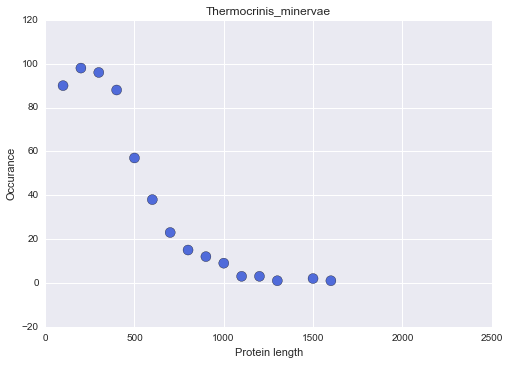

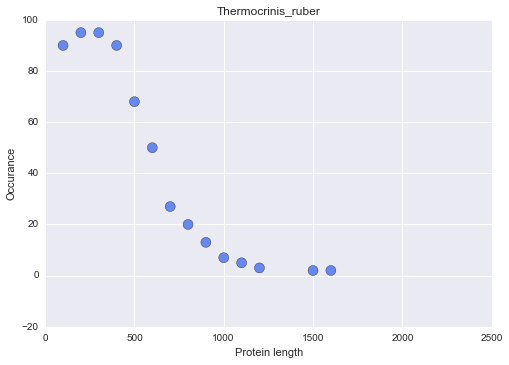

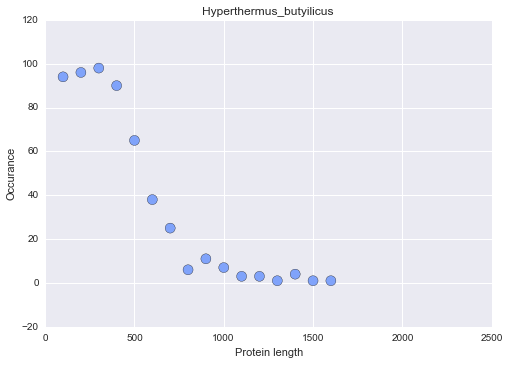

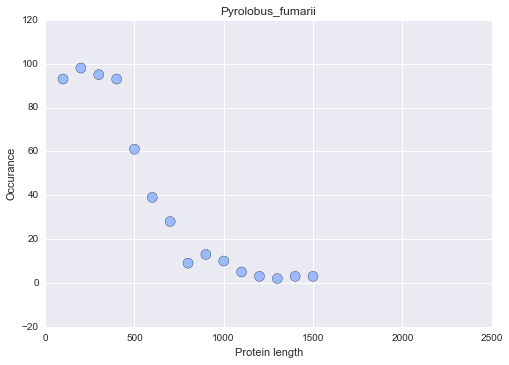

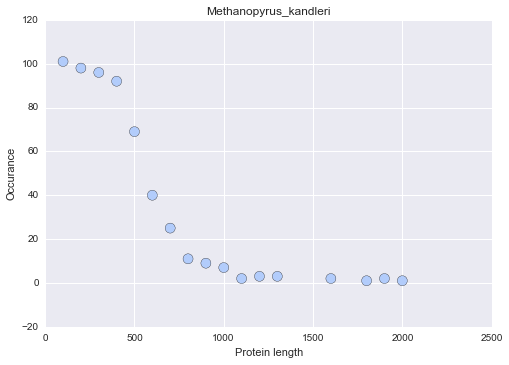

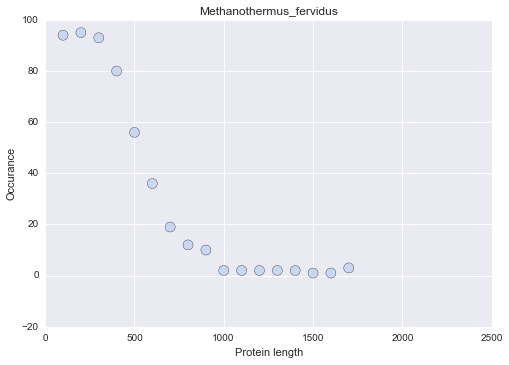

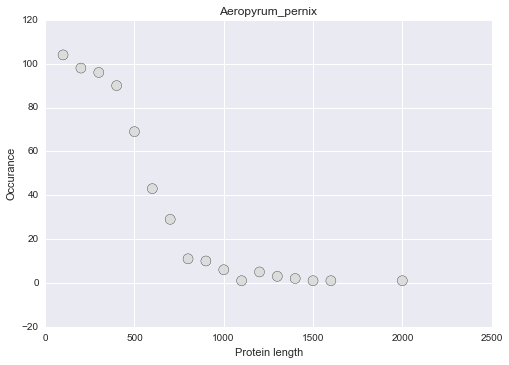

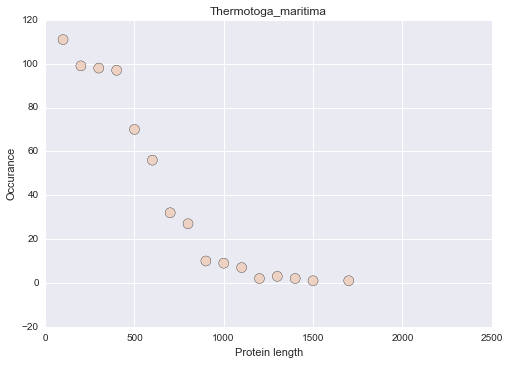

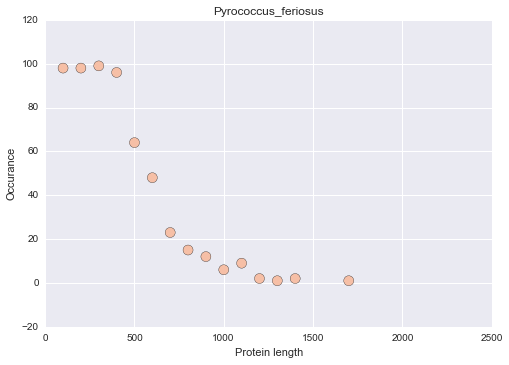

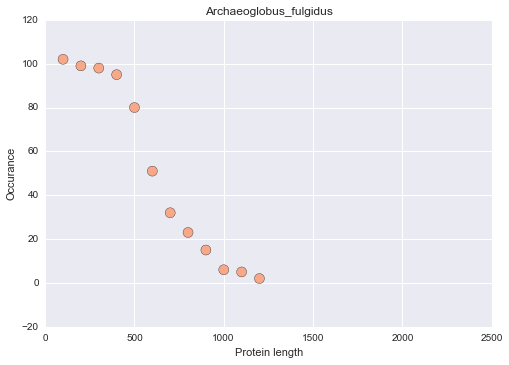

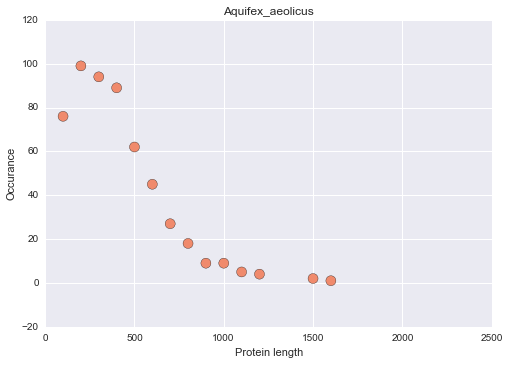

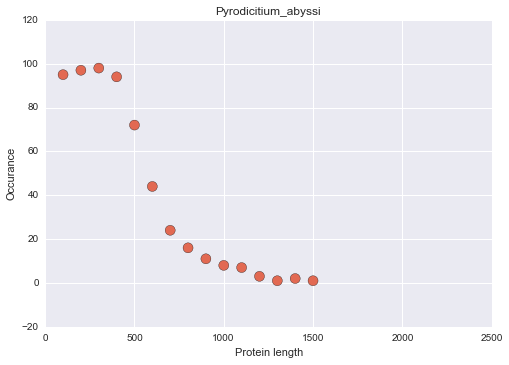

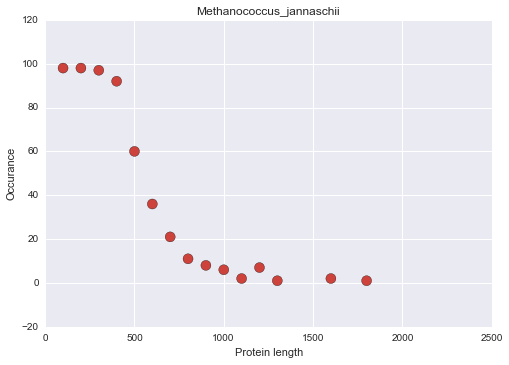

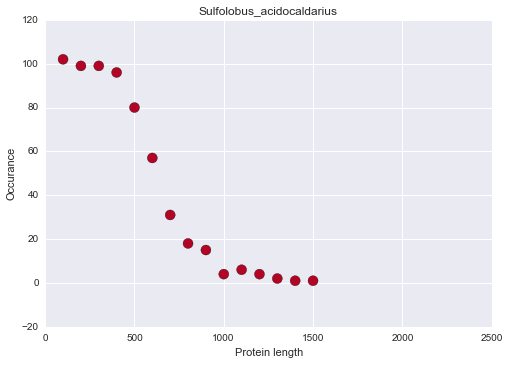

In [93]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats



import matplotlib.pyplot as plt

jet=plt.get_cmap('coolwarm')


num = 0
for genome, info in protein_lengths_every100.iteritems():
    num +=1
    x = info.keys()
    y = info.values()
    z = []
    for i in y:
        z.append(num)
    plt.title(genome)
    plt.xlabel('Protein length')
    plt.ylabel('Occurance')
    plt.xlim(0,2500)
    plt.scatter(x, y, s=100, c=z, cmap=jet, vmin=0, vmax=14)

    plt.show()
                    

In [94]:
Temp = [100,95,95,112,85,122,97,105,110,113,85,85,89,90]
average_lengths = []
for k,v in protein_lengths.iteritems():
    av = sum(protein_lengths) / 

SyntaxError: invalid syntax (<ipython-input-94-f823f3991193>, line 4)

In [95]:
amino_acid_usage

{'Aeropyrum_pernix': {'A': 48052,
  'C': 3312,
  'D': 21590,
  'E': 37623,
  'F': 14439,
  'G': 43653,
  'H': 7383,
  'I': 27992,
  'K': 20374,
  'L': 55053,
  'M': 9714,
  'N': 9540,
  'P': 25121,
  'Q': 8289,
  'R': 38231,
  'S': 30857,
  'T': 20700,
  'V': 46104,
  'W': 6507,
  'Y': 17521,
  '_': 1723},
 'Aquifex_aeolicus': {'A': 27900,
  'C': 3773,
  'D': 20503,
  'E': 45778,
  'F': 24310,
  'G': 31904,
  'H': 7323,
  'I': 34769,
  'K': 44692,
  'L': 50177,
  'M': 8885,
  'N': 17066,
  'P': 19265,
  'Q': 9693,
  'R': 23295,
  'S': 22643,
  'T': 19876,
  'V': 37733,
  'W': 4394,
  'Y': 19584,
  '_': 1499},
 'Archaeoglobus_fulgidus': {'A': 52393,
  'C': 7844,
  'D': 32676,
  'E': 59635,
  'F': 30339,
  'G': 48598,
  'H': 9998,
  'I': 48075,
  'K': 45970,
  'L': 63361,
  'M': 16765,
  'N': 21318,
  'P': 25712,
  'Q': 11999,
  'R': 38980,
  'S': 36851,
  'T': 27897,
  'V': 57510,
  'W': 7022,
  'Y': 24228,
  '_': 2854},
 'Hyperthermus_butyilicus': {'A': 46614,
  'C': 4456,
  'D': 19352

In [97]:
for i in amino_acid_usage['Aeropyrum_pernix'].keys():
    values = []
    for k,v in amino_acid_usage.iteritems():
        total = 0
        for g,h in v.iteritems():
            total += h

        norm = (v[i]/float(total)) * 100
        values.append(norm)
    if len(values) == 14:
        print i
        print pearsonr(Temp,values )
        if pearsonr(Temp,values)[1] <0.05:
            plt.scatter(Temp,values)
            plt.xlabel('Temperature ')
            plt.ylabel(i + ' usage ')
            plt.show()


A
(0.094672622780782825, 0.74750572002068627)
C
(0.22203981242736795, 0.44549974286509264)
E
(-0.30791206176322633, 0.28417641711615804)
D
(-0.13719341056652828, 0.64000394585576625)
G
(-0.077064835445658675, 0.79343338387667639)
F
(-0.055098636306951457, 0.85159820930940378)
I
(0.14079182533736156, 0.6311682369603413)
H
(0.17237058373589367, 0.5556872502093213)
K
(0.10491085607541641, 0.72114435409384492)
M
(0.4580717607785581, 0.099522580932542432)
L
(-0.27804655270514111, 0.33578687944535224)
N
(0.07545705344095649, 0.79766059966401848)
Q
(-0.063139305136663174, 0.83021015247055141)
P
(-0.090900375395360014, 0.7572851861327663)
S
(0.12019280074176146, 0.68233380940171606)
R
(-0.073295986011703396, 0.80335063719607813)
T
(0.17725892043905003, 0.54435658835215683)
W
(-0.046645145528892193, 0.87418682996142616)
V
(-0.071935739358604228, 0.80693680003049328)
Y
(-0.17294808018787619, 0.55434348396903177)
_
(0.034079342713570514, 0.90792447856737113)


#End codon usage

In [24]:
end_codons = {}

for cfile in glob.glob('CDS_extracted/*.fa'):
    print cfile
    temp = {}
    for read in HTSeq.FastaReader(cfile):
        end = read.seq[-3:]
        #print end
        if end in temp:
            temp[end] +=1
        else:
            temp[end] = 1
    end_codons[cfile.split('/')[1].split('.')[0].replace('_',' ')] = temp

CDS_extracted/Aeropyrum_pernix.CDS.fa
CDS_extracted/Aquifex_aeolicus.CDS.fa
CDS_extracted/Archaeoglobus_fulgidus.CDS.fa
CDS_extracted/Hyperthermus_butyilicus.CDS.fa
CDS_extracted/Methanococcus_jannaschii.CDS.fa
CDS_extracted/Methanopyrus_kandleri.CDS.fa
CDS_extracted/Methanothermus_fervidus.CDS.fa
CDS_extracted/Pyrococcus_feriosus.CDS.fa
CDS_extracted/Pyrodicitium_abyssi.CDS.fa
CDS_extracted/Pyrolobus_fumarii.CDS.fa
CDS_extracted/Sulfolobus_acidocaldarius.CDS.fa
CDS_extracted/Thermocrinis_minervae.CDS.fa
CDS_extracted/Thermocrinis_ruber.CDS.fa
CDS_extracted/Thermotoga_maritima.CDS.fa


In [25]:
end_codons

{'Aeropyrum pernix': {'TAA': 379, 'TAG': 929, 'TGA': 393},
 'Aquifex aeolicus': {'TAA': 763, 'TAG': 178, 'TGA': 556},
 'Archaeoglobus fulgidus': {'AAA': 2,
  'AAG': 1,
  'ACT': 1,
  'GAA': 1,
  'GAC': 1,
  'GAG': 2,
  'GCT': 1,
  'TAA': 804,
  'TAG': 370,
  'TGA': 1223},
 'Hyperthermus butyilicus': {'AAA': 1,
  'AAG': 1,
  'CGA': 1,
  'CGT': 1,
  'CTA': 1,
  'GAA': 1,
  'GAC': 1,
  'GCC': 1,
  'TAA': 446,
  'TAG': 986,
  'TGA': 272,
  'TTC': 1},
 'Methanococcus jannaschii': {'GAG': 1,
  'GCT': 1,
  'GGT': 1,
  'TAA': 1350,
  'TAG': 165,
  'TCG': 1,
  'TGA': 222,
  'TTT': 1},
 'Methanopyrus kandleri': {'ACT': 1,
  'CCC': 1,
  'CTC': 1,
  'GAG': 1,
  'GAT': 1,
  'GCG': 1,
  'GGC': 1,
  'GGG': 5,
  'GTC': 1,
  'TAA': 388,
  'TAG': 321,
  'TGA': 982,
  'TGG': 1},
 'Methanothermus fervidus': {'GAA': 1,
  'GTA': 1,
  'TAA': 658,
  'TAG': 238,
  'TGA': 401,
  'TTA': 1},
 'Pyrococcus feriosus': {'AGT': 1,
  'ATA': 1,
  'GAG': 1,
  'GCC': 1,
  'TAA': 670,
  'TAG': 413,
  'TGA': 950},
 'Pyrodici

(-0.37911890678155735, 0.18127457459898622)


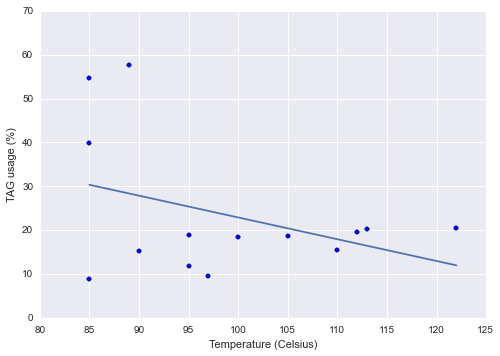

In [26]:
Temp = [100,95,95,112,85,122,97,105,110,113,85,85,89,90]

values = []
for k,v in end_codons.iteritems():
    total = 0
    for g,h in v.iteritems():
        total += h
        
    norm = (v['TAG']/float(total)) * 100
    values.append(norm)
        
        
plt.scatter(Temp,values)
plt.xlabel('Temperature (Celsius) ')
plt.ylabel('TAG usage (%)')
import numpy as np
x = Temp
y = values
plt.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1))(np.unique(x)))
plt.savefig('TAG_end_codon_usage.pdf')
print pearsonr(Temp,values )


(0.15446216108125246, 0.59802489825019467)


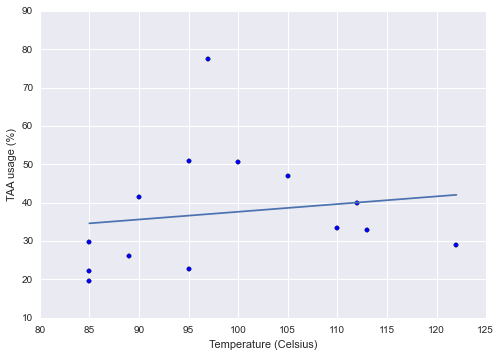

In [27]:
Temp = [100,95,95,112,85,122,97,105,110,113,85,85,89,90]

values = []
for k,v in end_codons.iteritems():
    total = 0
    for g,h in v.iteritems():
        total += h
        
    norm = (v['TAA']/float(total)) * 100
    values.append(norm)
        
        
plt.scatter(Temp,values)
plt.xlabel('Temperature (Celsius) ')
plt.ylabel('TAA usage (%)')
import numpy as np
x = Temp
y = values
plt.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1))(np.unique(x)))
plt.savefig('TAA_end_codon_usage.pdf')
print pearsonr(Temp,values )


(0.22114647124048251, 0.4473798246206877)


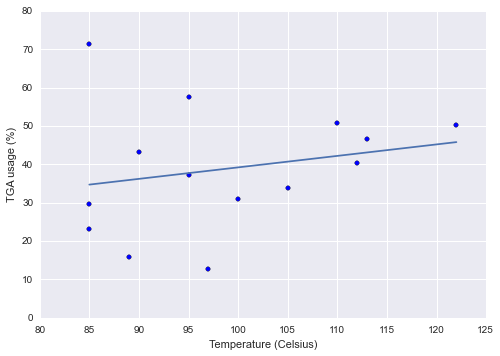

In [28]:
Temp = [100,95,95,112,85,122,97,105,110,113,85,85,89,90]

values = []
for k,v in end_codons.iteritems():
    total = 0
    for g,h in v.iteritems():
        total += h
        
    norm = (v['TGA']/float(total)) * 100
    values.append(norm)
        
        
plt.scatter(Temp,values)
plt.xlabel('Temperature (Celsius) ')
plt.ylabel('TGA usage (%)')
import numpy as np
x = Temp
y = values
plt.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1))(np.unique(x)))
plt.savefig('TGA_end_codon_usage.pdf')
print pearsonr(Temp,values )


#Amino acid kmer usage

In [104]:
def swap_dna(dnastring):
    table = {
        'ATA':'I', 'ATC':'I', 'ATT':'I', 'ATG':'M',
        'ACA':'T', 'ACC':'T', 'ACG':'T', 'ACT':'T',
        'AAC':'N', 'AAT':'N', 'AAA':'K', 'AAG':'K',
        'AGC':'S', 'AGT':'S', 'AGA':'R', 'AGG':'R',
        'CTA':'L', 'CTC':'L', 'CTG':'L', 'CTT':'L',
        'CCA':'P', 'CCC':'P', 'CCG':'P', 'CCT':'P',
        'CAC':'H', 'CAT':'H', 'CAA':'Q', 'CAG':'Q',
        'CGA':'R', 'CGC':'R', 'CGG':'R', 'CGT':'R',
        'GTA':'V', 'GTC':'V', 'GTG':'V', 'GTT':'V',
        'GCA':'A', 'GCC':'A', 'GCG':'A', 'GCT':'A',
        'GAC':'D', 'GAT':'D', 'GAA':'E', 'GAG':'E',
        'GGA':'G', 'GGC':'G', 'GGG':'G', 'GGT':'G',
        'TCA':'S', 'TCC':'S', 'TCG':'S', 'TCT':'S',
        'TTC':'F', 'TTT':'F', 'TTA':'L', 'TTG':'L',
        'TAC':'Y', 'TAT':'Y', 'TAA':'_', 'TAG':'_',
        'TGC':'C', 'TGT':'C', 'TGA':'_', 'TGG':'W',
        }
    protein = []
    end = len(dnastring) - (len(dnastring) %3) - 1
    for i in range(0,end,3):
        codon = dnastring[i:i+3]
        if codon in table:
            aminoacid = table[codon]
            protein.append(aminoacid)
        else:
            protein.append("N")
    return "".join(protein)





def window(seq, n=31):
    it = iter(seq)
    result = tuple(itertools.islice(it,n))
    if len(result) == n:
        yield result
    for elem in it:
        result = result[1:] + (elem,)
        yield result

In [105]:
All_kmers = {}
lengths = []
for genome in glob.glob('./CDS_extracted/*.CDS.fa'):
    kmers = {}
    total_length = 0
    print genome
    for read in HTSeq.FastaReader(genome):
        total_length += len(read.seq)
        k = 6
        seq = swap_dna(read.seq)
        for i in window(seq, k):
            kmer = "".join(i)
            if kmer in kmers:
                kmers[kmer] +=1
            else:
                kmers[kmer] = 1
    for k,v in kmers.iteritems():
        if k in All_kmers:
            prev = All_kmers[k]
            prev.append(v)
            All_kmers[k] = prev
        else:
            All_kmers[k] = [v]
            
    lengths.append(total_length)
            


./CDS_extracted/Aeropyrum_pernix.CDS.fa
./CDS_extracted/Aquifex_aeolicus.CDS.fa
./CDS_extracted/Archaeoglobus_fulgidus.CDS.fa
./CDS_extracted/Hyperthermus_butyilicus.CDS.fa
./CDS_extracted/Methanococcus_jannaschii.CDS.fa
./CDS_extracted/Methanopyrus_kandleri.CDS.fa
./CDS_extracted/Methanothermus_fervidus.CDS.fa
./CDS_extracted/Pyrococcus_feriosus.CDS.fa
./CDS_extracted/Pyrodicitium_abyssi.CDS.fa
./CDS_extracted/Pyrolobus_fumarii.CDS.fa
./CDS_extracted/Sulfolobus_acidocaldarius.CDS.fa
./CDS_extracted/Thermocrinis_minervae.CDS.fa
./CDS_extracted/Thermocrinis_ruber.CDS.fa
./CDS_extracted/Thermotoga_maritima.CDS.fa


In [106]:
Temp = [100,95,95,112,85,122,97,105,110,113,85,85,89,90]


occurance = {}
for k,v in All_kmers.iteritems():
    length = len(v)
    if length in occurance:
        occurance[length] +=1
    else:
        occurance[length] = 1


In [107]:
occurance

{1: 4037286,
 2: 771960,
 3: 222451,
 4: 74810,
 5: 28219,
 6: 12479,
 7: 5915,
 8: 3183,
 9: 1717,
 10: 946,
 11: 449,
 12: 238,
 13: 127,
 14: 88}

In [108]:
Present_kmers = {}


for k,v in All_kmers.iteritems():
    if len(v) == 14:
        #print k,v
        temp = []
        for d,f in zip(v,lengths):
            #print d,f
            value = ((float(d)/f)*100)
            temp.append(value)
        #print k, temp
        Present_kmers[k] = temp
        
print len(Present_kmers)

88


In [110]:
Present_kmers

{'AATNRP': [0.0001350131671591272,
  7.016628005046359e-05,
  9.949545852979541e-05,
  0.0002141619592678231,
  6.849751388273363e-05,
  6.614666567887646e-05,
  0.0001717426642267759,
  0.00011469803734453396,
  0.00024365299184554349,
  0.0001885194187569281,
  0.0001539592151775047,
  7.533768232660845e-05,
  6.858856395437762e-05,
  5.6802173932800755e-05],
 'ADFDGD': [6.75065835795636e-05,
  7.016628005046359e-05,
  9.949545852979541e-05,
  7.138731975594103e-05,
  6.849751388273363e-05,
  6.614666567887646e-05,
  8.587133211338794e-05,
  5.734901867226698e-05,
  6.091324796138587e-05,
  6.283980625230937e-05,
  5.131973839250157e-05,
  7.533768232660845e-05,
  6.858856395437762e-05,
  5.6802173932800755e-05],
 'AGKSTL': [0.0001350131671591272,
  0.00028066512020185437,
  9.949545852979541e-05,
  0.00014277463951188206,
  0.0003424875694136681,
  0.00019843999703662935,
  8.587133211338794e-05,
  0.00022939607468906793,
  0.00018273974388415763,
  0.0003770388375138562,
  0.000153

In [123]:
outputting = open('AA_kmer6_correlations.csv','w')
lines = []
pvals = []
Temp = [100,95,95,112,85,122,97,105,110,113,85,85,89,90]


for k,v in Present_kmers.iteritems():
    if len(v) == 14:
        #print k
        sig = pearsonr(Temp,v )[1]
        r2 = pearsonr(Temp,v )[0]
        #print r2, sig
        pvals.append(sig)
        lines.append(k + ',' + str(r2) + ',' + str(sig))
        
adjusted = correct_pvalues_for_multiple_testing(pvals)

for g,h in zip(lines,adjusted):
    outputting.write(g + ',' + str(h) + '\n')

outputting.close()


/Users/thomashitch/lab-dev/lib/python2.7/site-packages/IPython/kernel/__main__.py:18: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


GAGPAG
GAGPAG [0.00020251975073869077, 0.00014033256010092718, 4.974772926489771e-05, 0.0002141619592678231, 6.849751388273363e-05, 0.0003968799940732587, 0.0002576139963401638, 0.00028674509336133497, 0.00024365299184554349, 0.00025135922500923747, 0.00020527895357000628, 7.533768232660845e-05, 6.858856395437762e-05, 5.6802173932800755e-05]


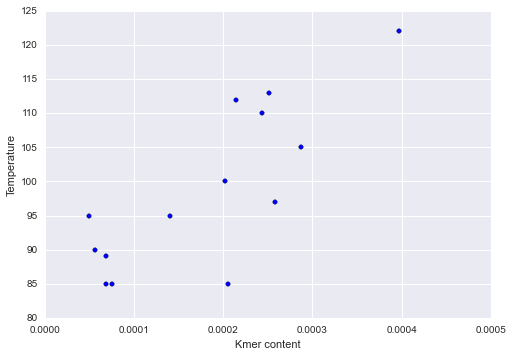

(0.80421321034785798, 0.00052560301164344167)
GKTLLA
GKTLLA [0.00033753291789781795, 0.00021049884015139075, 0.00019899091705959083, 0.0004283239185356462, 0.00020549254164820086, 0.00033073332839438226, 0.0002576139963401638, 0.00028674509336133497, 0.0003045662398069294, 0.0003770388375138562, 0.00010263947678500314, 0.0001506753646532169, 0.00020576569186313287, 0.00011360434786560151]


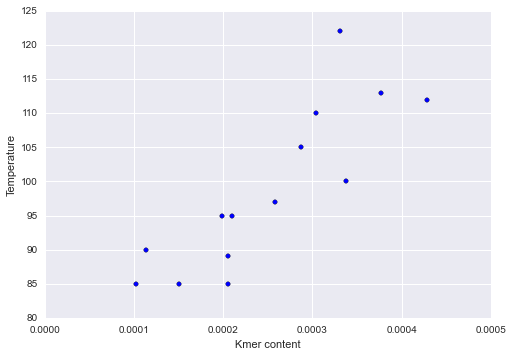

(0.851364762115423, 0.00011212949775153488)
Sig total;  2
Tested total;  88


In [49]:
species_temp = {}
tots = 0
tested = 0
wanted = []
sigg = []
Temp = [100,95,95,112,85,122,97,105,110,113,85,85,89,90]
count = 0
for k,v in Present_kmers.iteritems():
    count +=1
    tested +=1
    info = pearsonr(v, Temp)
    wanted.append(info[1])
    if info[1] > 0.05:
        continue
    else:
        if info[0] > 0.7 or info[0] < -0.7:
            print k
            print k,v
            plt.scatter(v, Temp)
            plt.xlabel('Kmer content')
            plt.ylabel('Temperature')
            plt.xlim(0,0.0005)
            plt.show()
            print pearsonr(v, Temp)
            sigg.append(count-1)
            tots +=1

print 'Sig total; ', tots
print 'Tested total; ', tested